In [58]:
!jupyter nbconvert --to script Preprocessing.ipynb
!jupyter nbconvert --to script Visualization.ipynb
!jupyter nbconvert --to script Model.ipynb

[NbConvertApp] Converting notebook Preprocessing.ipynb to script
[NbConvertApp] Writing 471 bytes to Preprocessing.py
[NbConvertApp] Converting notebook Visualization.ipynb to script
[NbConvertApp] Writing 1379 bytes to Visualization.py
[NbConvertApp] Converting notebook Model.ipynb to script
[NbConvertApp] Writing 2313 bytes to Model.py


## Importer les données  

In [59]:
# Main.ipynb fichier principal



import pandas as pd
from Preprocessing  import clean_text
from Model import train_and_evaluate_model, plot_confusion_matrix

# Chargement des données
data = pd.read_csv('mail.csv', sep=";")
#Netoyage des données 
data['cleaned_text'] = data['text'].apply(clean_text)

data.head()


,Column1,label,text,label_num,cleaned_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter follow note gave monday p...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom january see attached file hplnol xls h...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho around wonderful time ye...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,photoshop windows office cheap main trending a...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,indian springs deal book teco pvr revenue unde...


## Visualisation

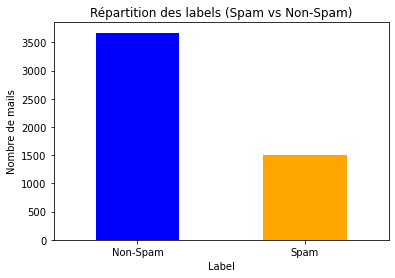

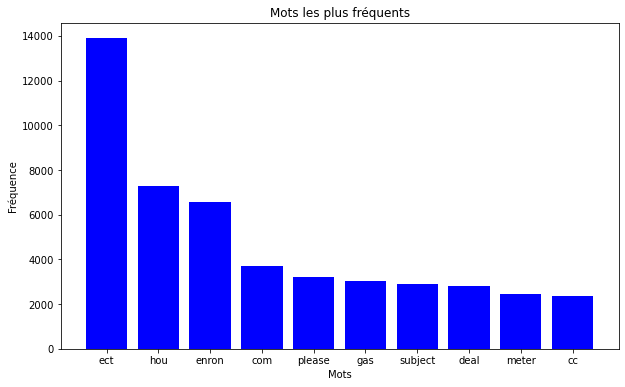

In [60]:
# Visualisation
from Visualization import plot_label_distribution, plot_word_frequency

plot_label_distribution(data)
plot_word_frequency(data)



## Modélisation

Accuracy: 0.9893719806763285
              precision    recall  f1-score   support

         ham       1.00      0.99      0.99       735
        spam       0.97      0.99      0.98       300

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035



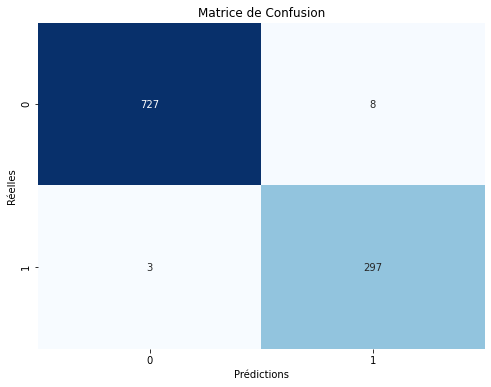

In [61]:
# Modélisation
model, vectorizer, X_test_vectorized, y_test = train_and_evaluate_model(data)
plot_confusion_matrix(model, X_test_vectorized, y_test)


**Prédir un nouveau mail**

In [62]:
# Nouveau mail à prédire
new_mail_text = "Hello, this is a new email. Please check it out."

# 1. Prétraitement du nouveau mail
cleaned_new_mail = clean_text(new_mail_text)

# 2. Vectorisation du texte
new_mail_vectorized = vectorizer.transform([cleaned_new_mail])

# 3. Prédiction avec le modèle
prediction = model.predict(new_mail_vectorized)

# Afficher la prédiction
print("Prédiction :", prediction[0])



Prédiction : spam
